# Taiwanese Credit Default Dataset

### Build a model to compute probability of default for Taiwanese Credit Card Clients
***
** Loading the dataset **
- Note that the dataset is not a csv file but an Excel Sheet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

df = pd.read_excel("./default of credit card clients_with_named_headers.xls")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Initial Exploration
***
In this stage we'll get an high level overview of what our dataset contains


***
### Number of rows (samples) and columns (features) in the dataset 

In [2]:
df.shape

(30000, 24)

***
### Analyzing the data types of each feature

In [3]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

All the features including the target are numerical

***
### Getting a summary of the numerical features

In [4]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


***

### Distplots for all the features

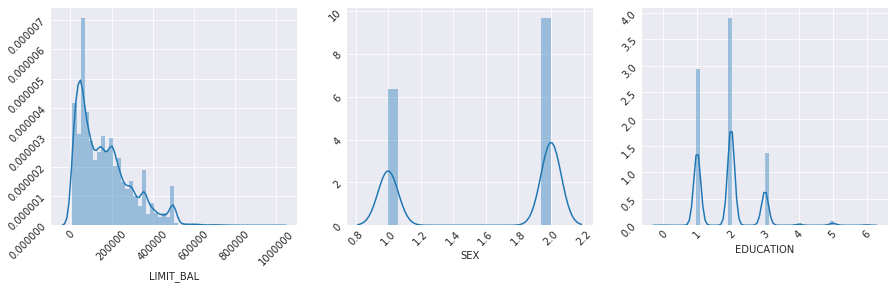

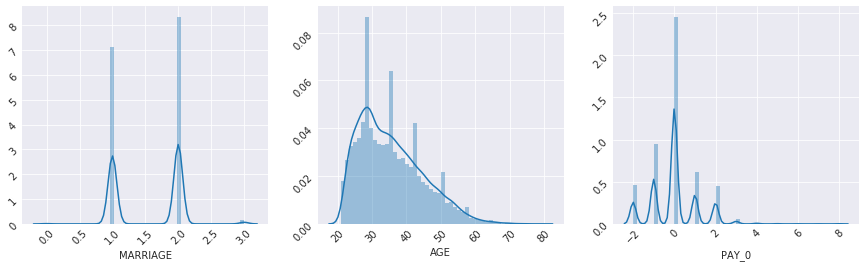

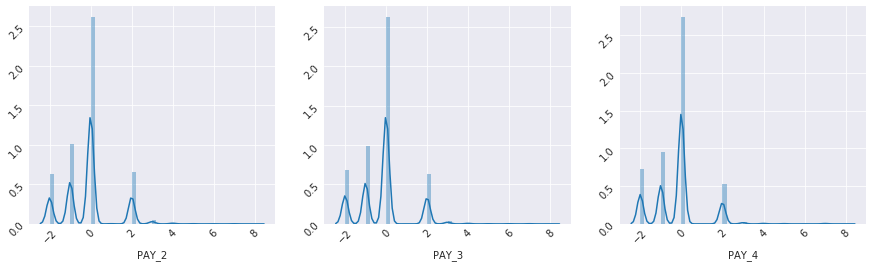

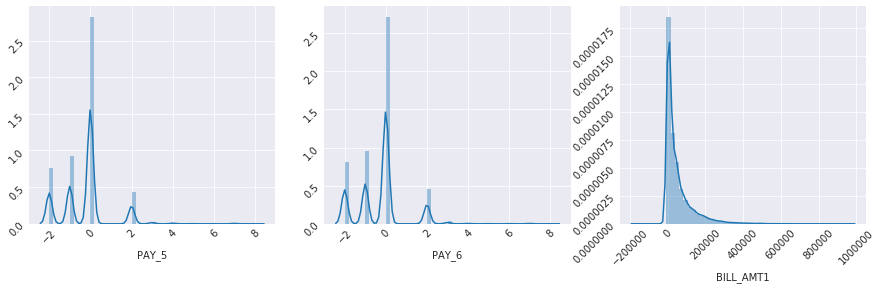

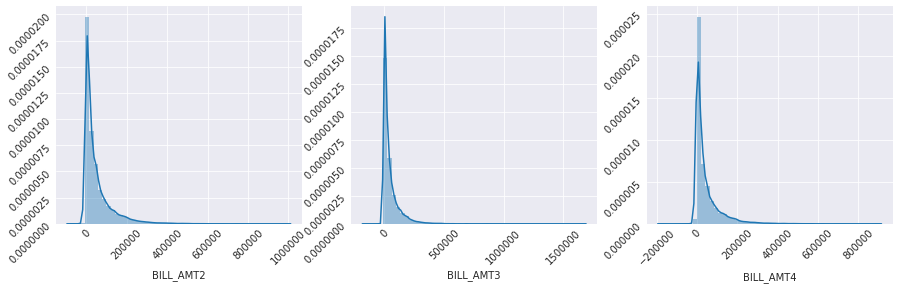

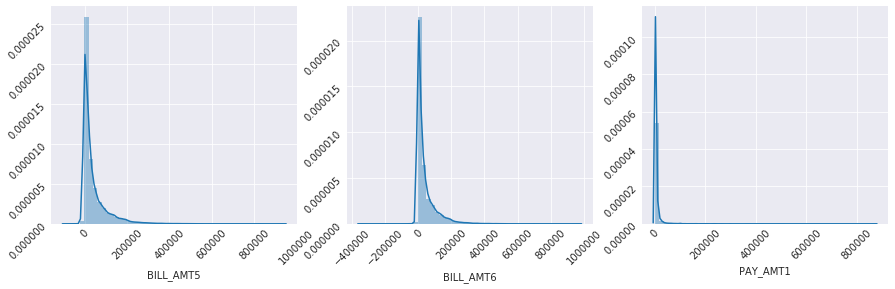

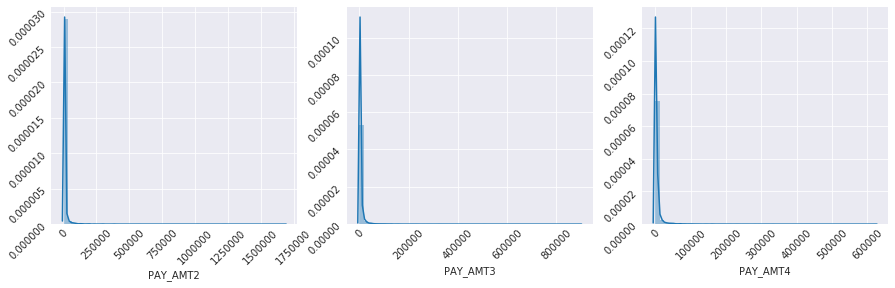

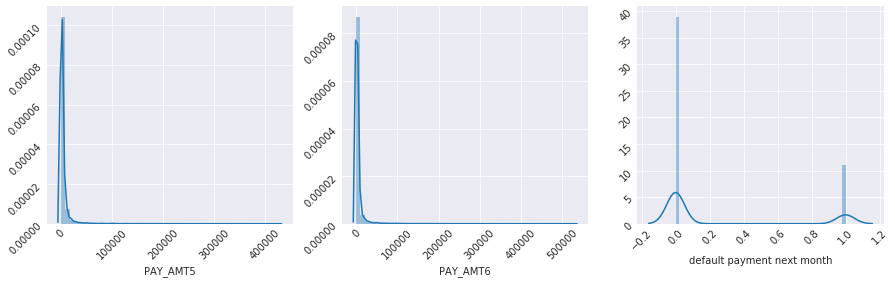

In [5]:
features = df.columns

# Plots distplots for all the features
for idx, feature in enumerate(features):
    if idx%3 == 0:
        plt.figure(figsize=(15,4))
        plt.subplot("131")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.distplot(df[feature])
    elif idx%3 == 1:
        plt.subplot("132")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.distplot(df[feature])
    else:
        plt.subplot("133")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.distplot(df[feature])


***
### Checking if there are any null values in the dataset

In [6]:
df.isnull().sum(axis=0)

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Great, there seems to be no null values in this dataset.

***
### Let's observe the correlation between all the features

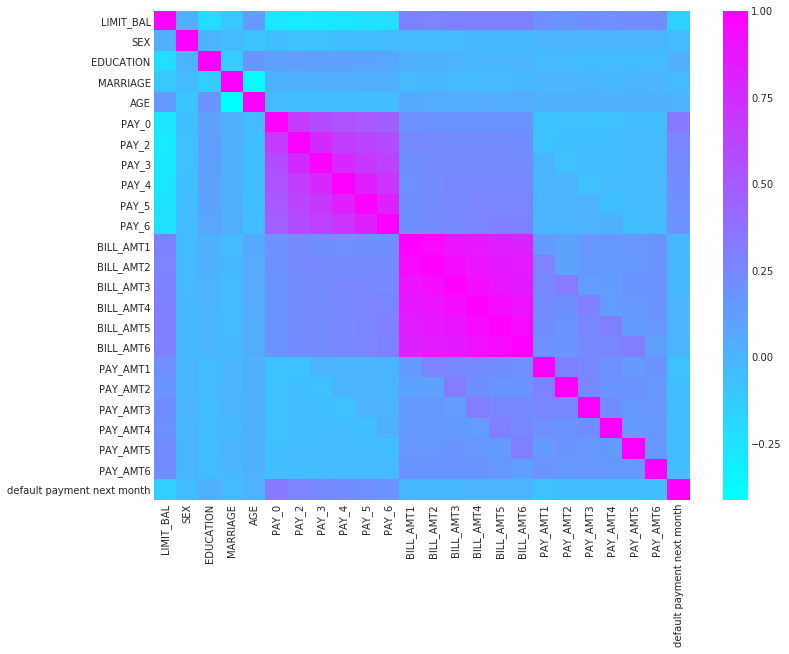

In [7]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=False, cmap='cool')

All the BILL_AMT features seem to be highly correlated.
Let's combine all of these features by replacing all of them by their mean

***
### Combine all the BILL_AMT into a single feature

In [8]:
cleaned_df = df.copy()
cleaned_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# Get all tje BILL_AMT column names
cols_bill = df.columns[11:17]
cols_paym = df.columns[17:23]

# Calculate mean across these columns
mean_bill = cleaned_df[cols_bill].mean(axis=1)
mean_paym = cleaned_df[cols_paym].mean(axis=1)

# Add BILL_AMT & BILL_PAYM features
cleaned_df.insert(0, "NEW_BILL_AMT", mean_bill)
cleaned_df.insert(1, "NEW_BILL_PAY", mean_paym)

# Drop the original rows from the dataframe  
cleaned_df.drop(list(cols_bill), axis=1, inplace=True)
cleaned_df.drop(list(cols_paym), axis=1, inplace=True)

cleaned_df.head()

,NEW_BILL_AMT,NEW_BILL_PAY,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
1,1284.000000,114.833333,20000,2,2,1,24,2,2,-1,-1,-2,-2,1
2,2846.166667,833.333333,120000,2,2,2,26,-1,2,0,0,0,2,1
3,16942.166667,1836.333333,90000,2,2,2,34,0,0,0,0,0,0,0
4,38555.666667,1398.000000,50000,2,2,1,37,0,0,0,0,0,0,0
5,18223.166667,9841.500000,50000,1,2,1,57,-1,0,-1,0,0,0,0


In [10]:
cleaned_df.shape

(30000, 14)

***
### Handling Outliers
Let's look at the box plots to get a feel for the outliers

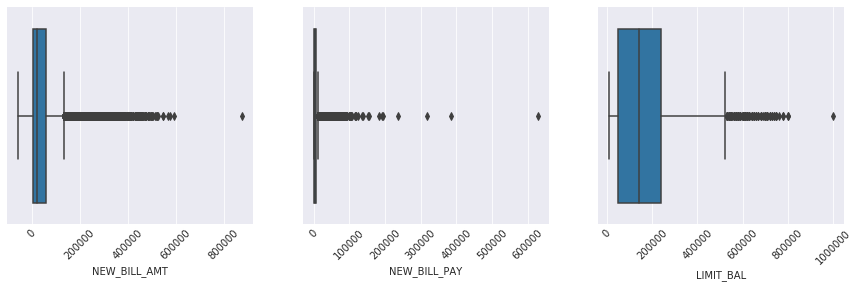

In [11]:
features = ['NEW_BILL_AMT', 'NEW_BILL_PAY', 'LIMIT_BAL']

# Plots distplots for all the features
for idx, feature in enumerate(features):
    if idx%3 == 0:
        plt.figure(figsize=(15,4))
        plt.subplot("131")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.boxplot(cleaned_df[feature])
    elif idx%3 == 1:
        plt.subplot("132")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.boxplot(cleaned_df[feature])
    else:
        plt.subplot("133")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.boxplot(cleaned_df[feature])

Lets remove the rows containing outliers

In [12]:
cleaned_df['Outlier'] = 0

for i in features:
    q75, q25 = np.percentile(cleaned_df[i].dropna(), [75,25])
    iqr = q75-q25
    minimum = q25-(iqr*1.5)
    maximum = q75+(iqr*1.5)
    
    cleaned_df.loc[cleaned_df[i]<minimum, 'Outlier'] = 1
    cleaned_df.loc[cleaned_df[i]>maximum, 'Outlier'] = 1
    print(cleaned_df['Outlier'] == 1).sum()

2575
4826
4894


In [13]:
# Would drop all rows with the value 1 in column 'Outlier'.
cleaned_df = cleaned_df[cleaned_df['Outlier'] != 1]
cleaned_df.shape

(25106, 15)

***
### Handling Skewness
- From the distplots above, it can be seen that some of the features are pretty skewed.
- Let's handle skewness by applying square root transform.

In [14]:
for feature in features[:-1]:
    # Apply sqrt transform only on those features containing all non-negative values
    if (cleaned_df[feature] >= 0).all():
        cleaned_df[feature] = np.sqrt(cleaned_df[feature])
cleaned_df.head()

,NEW_BILL_AMT,NEW_BILL_PAY,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,Outlier
1,1284.000000,10.716032,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,0
2,2846.166667,28.867513,120000,2,2,2,26,-1,2,0,0,0,2,1,0
3,16942.166667,42.852460,90000,2,2,2,34,0,0,0,0,0,0,0,0
4,38555.666667,37.389838,50000,2,2,1,37,0,0,0,0,0,0,0,0
5,18223.166667,99.204335,50000,1,2,1,57,-1,0,-1,0,0,0,0,0


***
### Scaling
We scale the features as scaled data gives better results with certain models **ex Logistic Regression**

In [15]:
from sklearn import preprocessing

# Scale all the features except the target
cleaned_df.iloc[:, 0:12] = preprocessing.scale(cleaned_df.iloc[:, 0:12])
cleaned_df.head()

,NEW_BILL_AMT,NEW_BILL_PAY,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,Outlier
1,-0.836664,-1.470186,-1.072609,0.803791,0.1642,-1.066796,-1.204707,1.752802,1.728727,-0.675800,-0.635871,-1.454695,-2,1,0
2,-0.787647,-0.712816,-0.202523,0.803791,0.1642,0.843136,-0.990385,-0.879337,1.728727,0.131328,0.185036,0.234906,2,1,0
3,-0.345350,-0.129294,-0.463549,0.803791,0.1642,0.843136,-0.133099,-0.001957,0.102718,0.131328,0.185036,0.234906,0,0,0
4,0.332826,-0.357222,-0.811583,0.803791,0.1642,-1.066796,0.188383,-0.001957,0.102718,0.131328,0.185036,0.234906,0,0,0
5,-0.305156,2.221987,-0.811583,-1.244105,0.1642,-1.066796,2.331597,-0.879337,0.102718,-0.675800,0.185036,0.234906,0,0,0


Seperating Features and Target Variables

In [16]:
from sklearn.model_selection import train_test_split

X = cleaned_df.iloc[:, 0:12]
y = cleaned_df.iloc[:, 13]

In [17]:
print(type(X), X.shape)

(<class 'pandas.core.frame.DataFrame'>, (25106, 12))


### Feature Selection

Personally, I'm not sure how SEX would determine whether a person defaults or not. Same goes for AGE as well.

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

all_features = list(cleaned_df.columns.values)

model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(X, y)
columns = list(rfe.support_)

columns_to_drop = []
for i,column in enumerate(columns):
    if column == False:
        columns_to_drop.append(all_features[i])
        print(all_features[i])

SEX
AGE


In [19]:
X.drop(['SEX', 'AGE'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X.shape)

(25106, 10)


***
### Time for Predictions!
- We first create a generalized function that takes data and the classifier as the input
- The function then splits the dataset into training and testing data and then measures performance of the classifier with this data
- We will then use this function to analyze performance of various different models.

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

parameters_grid = [{
    'solver':['newton-cg', 'saga'],
    'multi_class':['ovr', 'multinomial'],
    'C':[0.01, 0.1]
}]

clf = GridSearchCV(estimator=LogisticRegression(),
                param_grid=parameters_grid,
                n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.79248539564524689

In [22]:
log_loss(y_test, y_pred)


7.1673225997757415

In [23]:
clf.best_params_

{'C': 0.1, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

***
### Using Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state=9),
                               n_estimators=500,
                               max_samples=100,
                               bootstrap=True)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.80682421667551774

***
### Using AdaBoost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

boosting_clf = BaggingClassifier(n_estimators=500)

boosting_clf.fit(X_train, y_train)
y_pred = boosting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy